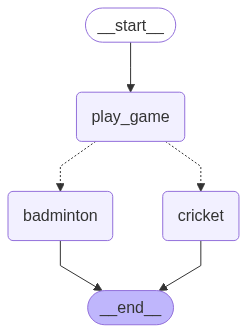

__ play_game node has been called __
__ badminton node has been called __

Final Output: {'name': 'Bilal wants to play badminton', 'game': 'badminton'}


In [12]:
import random
from typing import Literal
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Step 1: Define the TypedDict state
class typeDictState(TypedDict):
    name: str
    game: Literal["cricket", "badminton"]

# Step 2: Define the functions for each node
def play_game(state: typeDictState):
    print("__ play_game node has been called __")
    return {"name": state['name'] + " wants to play "}

def cricket(state: typeDictState):
    print("__ cricket node has been called __")
    return {"name":state["name"] + "cricket","game":"cricket"}

def badminton(state: typeDictState):
    print("__ badminton node has been called __")
    return {"name":state["name"] + "badminton","game":"badminton"}

# Step 3: Define the conditional routing logic
def decide_play(state: typeDictState) -> Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

# Step 4: Build the state graph
builder = StateGraph(typeDictState)
builder.add_node("play_game", play_game)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

# Step 5: Add edges
builder.add_edge(START, "play_game")
builder.add_conditional_edges("play_game", decide_play)
builder.add_edge("cricket", END)
builder.add_edge("badminton", END)

# Step 6: Compile and visualize the graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

# Step 7: Test invocation
result = graph.invoke({"name": "Bilal"})
print("\nFinal Output:", result)


In [14]:
import random
from typing import Literal
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

# Shared state
class GameState(TypedDict):
    name: str
    message: str
    decision: str

# Start node - this kicks off the process
def start(state: GameState) -> GameState:
    return state

# Decision node
def decide_play(state: GameState) -> Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

# Cricket node
def play_cricket(state: GameState) -> GameState:
    return {
        **state,
        "decision": "You will play cricket today!",
    }

# Badminton node
def play_badminton(state: GameState) -> GameState:
    return {
        **state,
        "decision": "You will play badminton today!",
    }

# Build the graph
graph = StateGraph(GameState)

# Add nodes
graph.add_node("start", start)
graph.add_node("cricket", play_cricket)
graph.add_node("badminton", play_badminton)

# Add edges
graph.add_edge(START, "start")
graph.add_conditional_edges(
    "start",
    decide_play,
    {
        "cricket": "cricket",
        "badminton": "badminton"
    }
)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

# Compile the graph
app = graph.compile()

# Run it
result = app.invoke({
    "name": "Bilal",
    "message": "Hi I want to play",
    "decision": ""
})
print(result)


{'name': 'Bilal', 'message': 'Hi I want to play', 'decision': 'You will play cricket today!'}


In [17]:
import random
from typing import Literal
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI

# Load OpenAI GPT-4o
llm = ChatOpenAI(model="gpt-4o")  # Make sure OPENAI_API_KEY is set in your environment

# Shared state
class GameState(TypedDict):
    name: str
    message: str
    decision: str

# Start node using GPT-4o
def start(state: GameState) -> GameState:
    print("Start node called")
    user_message = state["message"]
    response = llm.invoke(user_message)
    return {
        **state,
        "message": response.content
    }

# Random decision node
def decide_play(state: GameState) -> Literal["cricket", "badminton"]:
    if random.random() < 2:
        return "cricket"
    else:
        return "badminton"

# Cricket node
def play_cricket(state: GameState) -> GameState:
    return {
        **state,
        "decision": "You will play cricket today!",
    }

# Badminton node
def play_badminton(state: GameState) -> GameState:
    return {
        **state,
        "decision": "You will play badminton today!",
    }

# Build graph
graph = StateGraph(GameState)

graph.add_node("start", start)
graph.add_node("cricket", play_cricket)
graph.add_node("badminton", play_badminton)

graph.add_edge(START, "start")
graph.add_conditional_edges(
    "start",
    decide_play,
    {
        "cricket": "cricket",
        "badminton": "badminton"
    }
)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

# Compile graph
app = graph.compile()

# Run it
result = app.invoke({
    "name": "Bilal",
    "message": "Hi I want to play",
    "decision": ""
})

print("Final Result:\n", result)


Start node called
Final Result:
 {'name': 'Bilal', 'message': "Sure! What would you like to play? I can suggest games, quizzes, or even help with puzzles and riddles. Let me know what you're in the mood for!", 'decision': 'You will play cricket today!'}


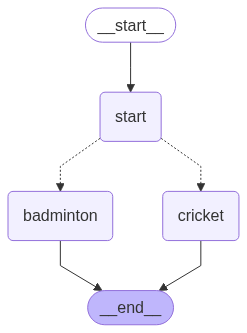

Start node called
Final Result:
 {'name': 'Bilal', 'message': 'Hi! What would you like to play? Are you thinking of a specific game, a type of game, or something else entirely? Let me know how I can help!', 'decision': 'You will play cricket today!'}


In [18]:
import random
from typing import Literal
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from IPython.display import display, Image

# Load OpenAI GPT-4o
llm = ChatOpenAI(model="gpt-4o")  # Make sure OPENAI_API_KEY is set

# Shared state
class GameState(TypedDict):
    name: str
    message: str
    decision: str

# Start node using GPT-4o
def start(state: GameState) -> GameState:
    print("Start node called")
    user_message = state["message"]
    response = llm.invoke(user_message)
    return {
        **state,
        "message": response.content
    }

# Random decision node
def decide_play(state: GameState) -> Literal["cricket", "badminton"]:
    if random.random() < 0.5:  # correct logic
        return "cricket"
    else:
        return "badminton"

# Cricket node
def play_cricket(state: GameState) -> GameState:
    return {
        **state,
        "decision": "You will play cricket today!",
    }

# Badminton node
def play_badminton(state: GameState) -> GameState:
    return {
        **state,
        "decision": "You will play badminton today!",
    }

# Build graph
graph = StateGraph(GameState)

graph.add_node("start", start)
graph.add_node("cricket", play_cricket)
graph.add_node("badminton", play_badminton)

graph.add_edge(START, "start")
graph.add_conditional_edges(
    "start",
    decide_play,
    {
        "cricket": "cricket",
        "badminton": "badminton"
    }
)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

# Compile graph
app = graph.compile()

# 👇 Display the graph (THIS WAS MISSING)
display(Image(app.get_graph().draw_mermaid_png()))

# Run the graph
result = app.invoke({
    "name": "Bilal",
    "message": "Hi I want to play",
    "decision": ""
})

print("Final Result:\n", result)
